In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.mlab as mlab
import iopro
from custom_python_utilities.histR import histRec, histR
from custom_python_utilities.plot_format import create_single_figure, format_axes

In [3]:
fitted = iopro.genfromtxt('visual_output/default.results/condor_mle_cvxnl_results.csv')

In [4]:
save_pdf = False

true_proportions = [ 0.00527027, 0.0102583, 0.09760324, 0.3886090, 0.498259058 ]
category_names = [ r'$D\tau_h$', r'$D^*\tau_h$', r'$D^{**}SL$', r'SLHad', r'Cont' ]
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#CC79A7']

In [5]:
def plot_yields(arr, bins=25, true_value=None,
                ax=None, color=None, legend_label=None,
                line_fmt = 'r--', linewidth=3,
                text_fontsize=30, tick_fontsize=25, 
                xlabel='Fitted Yield', ylabel='Counts (a.u.)', title=None):
    
    mu, sigma = scipy.stats.norm.fit(arr)

    if ax is None: ax = plt.gca()
    ax = format_axes(ax, tick_fontsize=tick_fontsize)
    
    show_legend = False
    if legend_label:
        show_legend = True

    histR(arr, bins=bins, normed=True,
          hist_colors=[color], 
          legend_fontsize=text_fontsize, axislabel_fontsize=text_fontsize,
          legend_names=[legend_label], legend=show_legend,
          xlabel=xlabel, ylabel=ylabel, ax=ax);
    f_counts, f_bins = np.histogram(arr, bins=bins, normed=True)
    y = mlab.normpdf(f_bins, mu, sigma)
    ax.plot(f_bins, y, line_fmt, linewidth=linewidth);
    
    if title:
        ax.set_title(title, fontsize=text_fontsize)

        
    text_x = np.min(fitted[:,c]) + (np.max(fitted[:,c])-np.min(fitted[:,c])) * 0.1
    text_y = np.max(f_counts)*0.9
    ax.annotate(r'$\mu={0}$'.format(round(mu,4)), xy=(text_x,text_y), xytext=(text_x,text_y), fontsize=text_fontsize)
    text_y = np.max(f_counts)*0.8
    ax.annotate(r'$\sigma={0}$'.format(round(sigma,4)), xy=(text_x,text_y), xytext=(text_x,text_y), fontsize=text_fontsize)
    text_y = np.max(f_counts)*0.7
    ax.annotate(r'$\sigma/\mu={0}$'.format(round(sigma/mu,4)), xy=(text_x,text_y), xytext=(text_x,text_y), fontsize=text_fontsize)
    text_y = np.max(f_counts)*0.6
    
    if true_value:
        ax.annotate(r'$bias={0}$'.format(round(mu-true_value,4)), 
                    xy=(text_x,text_y), xytext=(text_x,text_y), fontsize=text_fontsize)

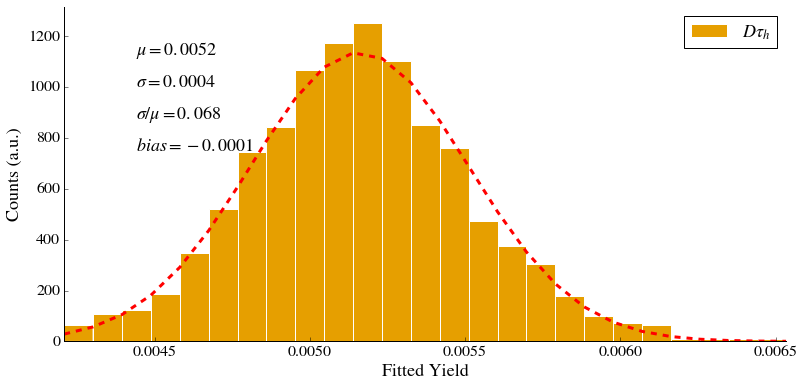

In [6]:
evttype = 1

c = evttype - 1
fig = plt.figure(figsize=(8*1.618, 6))
ax = fig.add_subplot(1,1,1)
plot_yields(fitted[:,c], true_value=true_proportions[c], 
            legend_label=category_names[c],
            text_fontsize=18, tick_fontsize=16,
            color=colors[c], ax=ax)
                
if save_pdf: fig.savefig('evttype{0}_fit.pdf'.format(evttype))

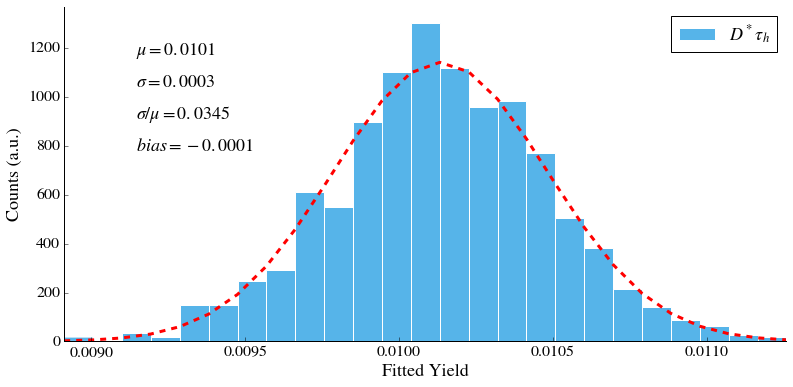

In [7]:
evttype = 2

c = evttype - 1
fig = plt.figure(figsize=(8*1.618, 6))
ax = fig.add_subplot(1,1,1)
plot_yields(fitted[:,c], true_value=true_proportions[c], 
            legend_label=category_names[c],
            text_fontsize=18, tick_fontsize=16,
            color=colors[c], ax=ax)
                
if save_pdf: fig.savefig('evttype{0}_fit.pdf'.format(evttype))

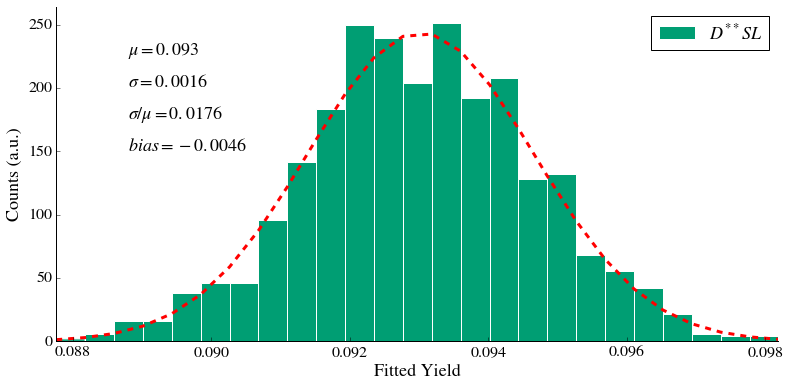

In [8]:
evttype = 3

c = evttype - 1
fig = plt.figure(figsize=(8*1.618, 6))
ax = fig.add_subplot(1,1,1)
plot_yields(fitted[:,c], true_value=true_proportions[c], 
            legend_label=category_names[c],
            text_fontsize=18, tick_fontsize=16,
            color=colors[c], ax=ax)
                
if save_pdf: fig.savefig('evttype{0}_fit.pdf'.format(evttype))

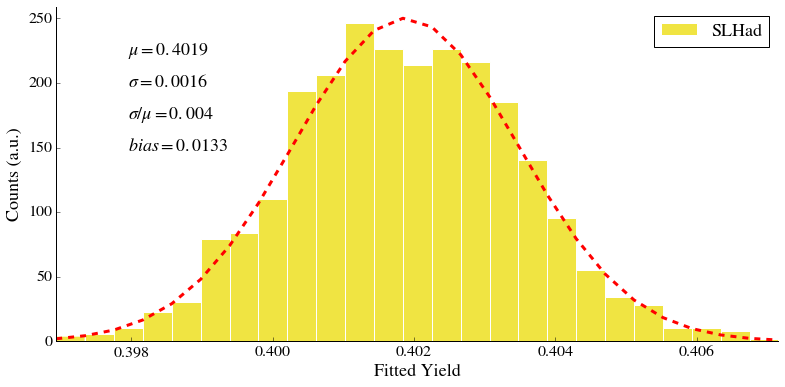

In [9]:
evttype = 4

c = evttype - 1
fig = plt.figure(figsize=(8*1.618, 6))
ax = fig.add_subplot(1,1,1)
plot_yields(fitted[:,c], true_value=true_proportions[c], 
            legend_label=category_names[c],
            text_fontsize=18, tick_fontsize=16,
            color=colors[c], ax=ax)
                
if save_pdf: fig.savefig('evttype{0}_fit.pdf'.format(evttype))

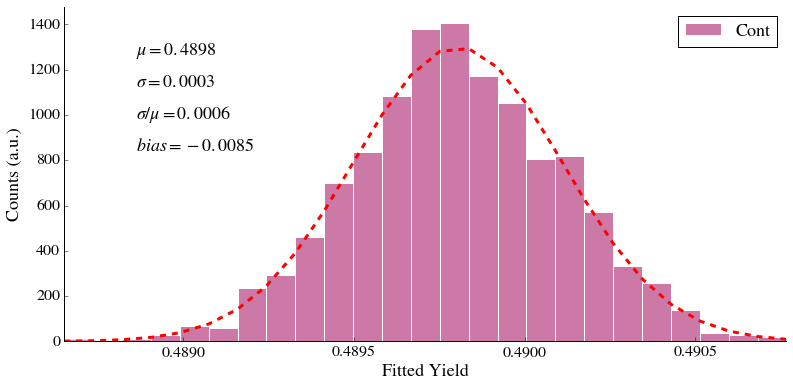

In [10]:
evttype = 5

c = evttype - 1
fig = plt.figure(figsize=(8*1.618, 6))
ax = fig.add_subplot(1,1,1)
plot_yields(fitted[:,c], true_value=true_proportions[c], 
            legend_label=category_names[c],
            text_fontsize=18, tick_fontsize=16,
            color=colors[c], ax=ax)
                
if save_pdf: fig.savefig('evttype{0}_fit.pdf'.format(evttype))